In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('feature_time_48k_2048_load_1.csv')
df.head(10)

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
5,0.43726,-0.44435,0.021119,0.138763,0.140328,-0.131329,-0.168557,3.115990,6.644538,Ball_007_1
6,0.45353,-0.49129,0.021464,0.138461,0.140082,-0.114175,0.308107,3.237609,6.526352,Ball_007_1
7,0.43955,-0.45228,0.020860,0.150120,0.151526,-0.021955,-0.272298,2.900820,7.263885,Ball_007_1
8,0.49233,-0.37217,0.020244,0.145361,0.146729,0.074174,-0.421814,3.355377,7.248013,Ball_007_1
9,0.37154,-0.49087,0.018105,0.136393,0.137556,-0.136237,-0.097889,2.701005,7.597902,Ball_007_1


PCA Is Unsupervised technique

In [3]:
# First step is to standarize the data 

features = ['max','min','mean','sd','rms','skewness','kurtosis','crest','form' ]

# Separating out the features
x = df.loc[:, features].values

# Separating out the fault
y = df.loc[:,['fault']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)



PCA analysis so that 9 dimensional data is converted into 4 dimensional data for easier data visualisation


[0.61875254 0.1969557  0.11383756 0.07045421]
[0.61875254 0.81570824 0.92954579 1.        ]


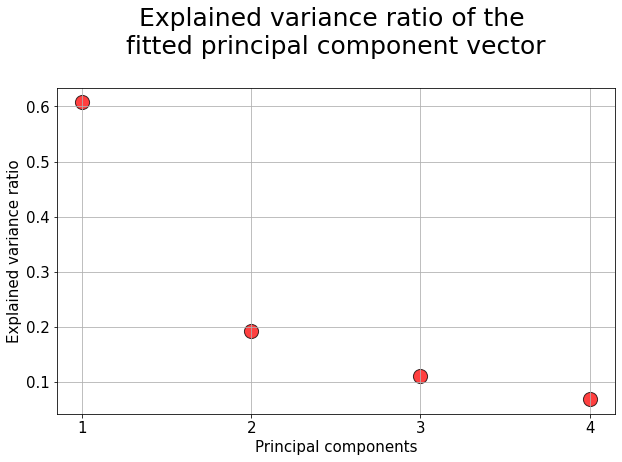

In [7]:
# PCA projection to 4 dimensional data from 9 dimensions in the original data as about 80 percent covariance have been reached in till 4th dimension

from sklearn.decomposition import PCA
from sklearn import decomposition

pca = decomposition.PCA(n_components= 4)

principal_components = pca.fit_transform(x)
percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_variance_retained = np.cumsum(percent_variance_retained)
print(percent_variance_retained)
print(cum_variance_retained)

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='red',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()




above data shows that about 60 percent data is stored in 1 analysis 20% in the 2nd and 10% in third.

In [8]:
#principal_df = pd.DataFrame(data = principal_components, columns= ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9'])
principal_df = pd.DataFrame(data = principal_components, columns= ['PCA1','PCA2','PCA3','PCA4'])

principal_df.head(14)

,PCA1,PCA2,PCA3,PCA4
0,-1.955850,-0.047824,0.286751,-0.689470
1,-1.923312,-0.342601,-1.322118,0.135784
2,-1.886891,-0.301538,-0.611429,-0.353413
3,-1.630098,0.172454,-0.546031,-0.359984
4,-1.829458,0.253825,-0.389668,-0.796217
5,-1.891371,0.223968,-0.098875,-0.939306
6,-1.825265,0.304687,-0.206322,-0.832121
7,-1.930745,-0.199021,-0.412568,-0.668038
8,-1.864597,-0.309277,-0.742087,-0.126857
9,-1.940892,-0.099378,0.339871,-0.874016


In [9]:
# so new data set after principle component analysis

Final_df = pd.concat([principal_df, df[['fault']]], axis=1)
df1 = Final_df.drop(columns=['PCA1','PCA2','PCA3','PCA4'])
#df1 = Final_df.drop(columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9'])
Final_df.head(15)


,PCA1,PCA2,PCA3,PCA4,fault
0,-1.955850,-0.047824,0.286751,-0.689470,Ball_007_1
1,-1.923312,-0.342601,-1.322118,0.135784,Ball_007_1
2,-1.886891,-0.301538,-0.611429,-0.353413,Ball_007_1
3,-1.630098,0.172454,-0.546031,-0.359984,Ball_007_1
4,-1.829458,0.253825,-0.389668,-0.796217,Ball_007_1
5,-1.891371,0.223968,-0.098875,-0.939306,Ball_007_1
6,-1.825265,0.304687,-0.206322,-0.832121,Ball_007_1
7,-1.930745,-0.199021,-0.412568,-0.668038,Ball_007_1
8,-1.864597,-0.309277,-0.742087,-0.126857,Ball_007_1
9,-1.940892,-0.099378,0.339871,-0.874016,Ball_007_1


In [10]:
df1.head(5)

,fault
0,Ball_007_1
1,Ball_007_1
2,Ball_007_1
3,Ball_007_1
4,Ball_007_1


In [11]:
df = np.array(principal_df)
unique_classes = ['Ball_007', 'Ball_014', 'Ball_021', 'IR_007' ,'IR_014', 'IR_021' ,'Normal','OR_007', 'OR_014', 'OR_021']
df.shape
df1 = np.array(df1)
df1.shape


(2300, 1)

In [12]:
classes = pd.Categorical(df1, categories=unique_classes).codes
print(unique_classes)
print(classes)

['Ball_007', 'Ball_014', 'Ball_021', 'IR_007', 'IR_014', 'IR_021', 'Normal', 'OR_007', 'OR_014', 'OR_021']
[-1 -1 -1 ... -1 -1 -1]


In [13]:
data_train, data_test= train_test_split(df, test_size=0.33, random_state=42)
labels_train, labels_test = train_test_split(classes, test_size=0.33,random_state=252)

data_train = data_train.reshape(-1,data_train.shape[1],1)
data_test = data_test.reshape(-1,data_test.shape[1],1)

print('X train shape',data_train.shape)
print('X test shape',data_test.shape)

from keras.utils import to_categorical
labels_train = tf.keras.utils.to_categorical(labels_train, 10)
labels_test = tf.keras.utils.to_categorical(labels_test, 10)

print('labels train shape',labels_train.shape)
print('labels test shape',labels_test.shape)

# Shuffling our data
index = np.random.permutation(len(labels_train))
data_train, labels_train = data_train[index], labels_train[index]


X train shape (1541, 4, 1)
X test shape (759, 4, 1)
labels train shape (1541, 10)
labels test shape (759, 10)


In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Flatten

In [16]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape = (4,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 4, 16)             32        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 16)             272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 16)             0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

N_Network = model.fit(data_train , labels_train, epochs=5, batch_size=128, validation_data=(data_test, labels_test)) 

Epoch 1/5
13/13 [==============================] - 0s 27ms/step - loss: 2.1289 - accuracy: 0.2654 - val_loss: 1.8623 - val_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 0s 4ms/step - loss: 1.6214 - accuracy: 1.0000 - val_loss: 1.2796 - val_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 0s 5ms/step - loss: 0.9727 - accuracy: 1.0000 - val_loss: 0.6142 - val_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 1.0000 - val_loss: 0.2023 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 0.1234 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 1.0000


In [ ]:
model.evaluate(data_test,labels_test, batch_size = 128, verbose = 0)

[0.00029599101981148124, 1.0]

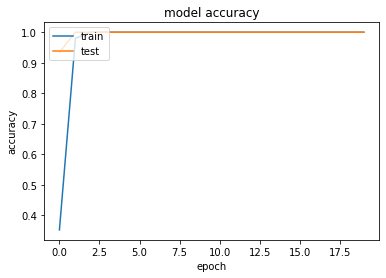

In [ ]:
plt.plot(N_Network.history['accuracy'])
plt.plot(N_Network.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()